In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd
from geopy.geocoders import Nominatim
from textblob import TextBlob
import nltk
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Load the dataset
data = pd.read_csv(r"C:\Users\kriti\OneDrive\Desktop\SNU\7th semester\project\final\zomato-banglore.csv")
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [10]:
# Drop unnecessary columns
data = data.drop(columns=['url', 'menu_item', 'listed_in(type)', 'listed_in(city)', 'phone'])
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  
3  [('Rated 4.0', "RATED\n  Great food and proper...  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...

In [11]:
# Data cleaning and preprocessing
data = data.dropna(subset=['rate', 'approx_cost(for two people)', 'location', 'cuisines'])
# Replace 'NEW' or '-' in 'rate' with NaN
data['rate'] = data['rate'].replace(['NEW', '-'], np.nan)
# Extract numeric rating and convert to float
data['rate'] = data['rate'].apply(lambda x: float(str(x).split('/')[0]) if pd.notnull(x) else np.nan)
# Convert 'approx_cost(for two people)' to numeric
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: str(x).replace(',', '')).astype(float)
# Fill missing votes with 0 and convert to int
data['votes'] = data['votes'].fillna(0).astype(int)

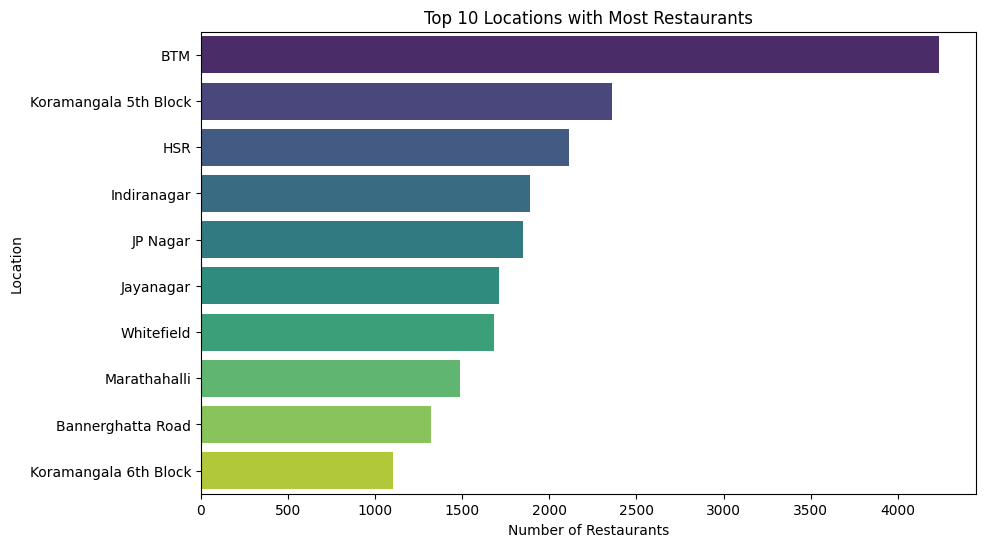

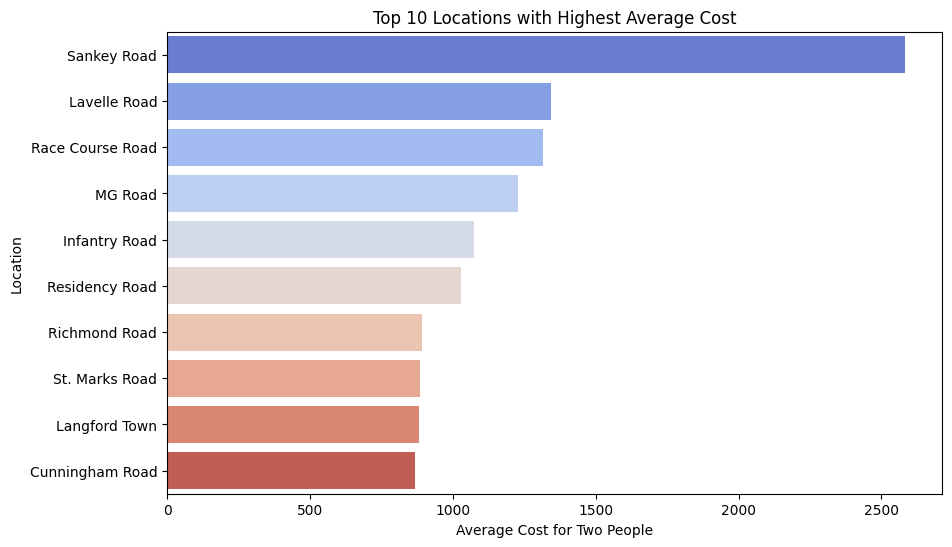

In [12]:
# Exploratory Data Analysis
# Number of restaurants in each location
location_counts = data['location'].value_counts()

# Popular cuisines in each location
cuisine_counts = data['cuisines'].str.split(',').explode().value_counts()

# Average cost for two people in each location
average_cost = data.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(y=location_counts.index[:10], x=location_counts.values[:10], palette='viridis')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(y=average_cost.index[:10], x=average_cost.values[:10], palette='coolwarm')
plt.title('Top 10 Locations with Highest Average Cost')
plt.xlabel('Average Cost for Two People')
plt.ylabel('Location')
plt.show()

In [13]:
# Data cleaning and preprocessing for clustering
# Create a copy of the data to avoid modifying the original dataframe
data_clustering = data.copy()

# Drop rows with missing values in essential columns for clustering
data_clustering = data_clustering.dropna(subset=['rate', 'approx_cost(for two people)', 'location', 'cuisines'])

# Replace 'NEW' or '-' in 'rate' with NaN and convert ratings to numeric
data_clustering['rate'] = data_clustering['rate'].replace(['NEW', '-'], np.nan).apply(lambda x: float(str(x).split('/')[0]) if pd.notnull(x) else np.nan)

# Drop any remaining rows with NaNs in the 'rate' column
data_clustering = data_clustering.dropna(subset=['rate'])

# Convert 'approx_cost(for two people)' to numeric
data_clustering['approx_cost(for two people)'] = data_clustering['approx_cost(for two people)'].apply(lambda x: str(x).replace(',', '')).astype(float)

# Encoding the 'location' column
le_location = LabelEncoder()
data_clustering['location_encoded'] = le_location.fit_transform(data_clustering['location'])

# Encoding the 'cuisines' column
le_cuisines = LabelEncoder()
data_clustering['cuisines_encoded'] = le_cuisines.fit_transform(data_clustering['cuisines'])

# Combine the encoded columns (including cuisines) with the original dataframe (excluding the original 'cuisines' column)
data_clustering_encoded = data_clustering[['rate', 'approx_cost(for two people)', 'location_encoded', 'cuisines_encoded']]

C:\Users\kriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

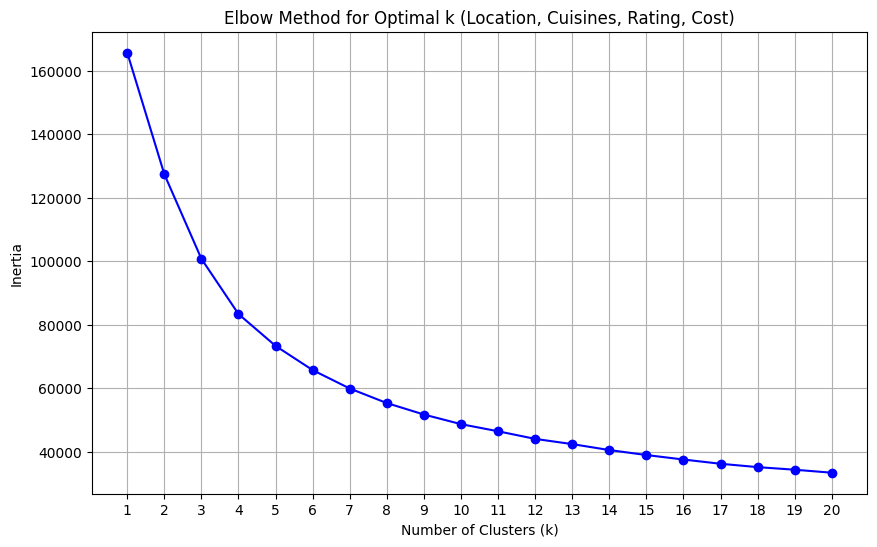

In [14]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clustering_encoded)

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 21)  # Testing k values from 1 to 20

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to the closest cluster center

# Plotting the elbow graph with integer x-axis labels
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Location, Cuisines, Rating, Cost)')
plt.xticks(k_range)  # Set x-axis labels as integers from 1 to 20
plt.grid(True)
plt.show()

C:\Users\kriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


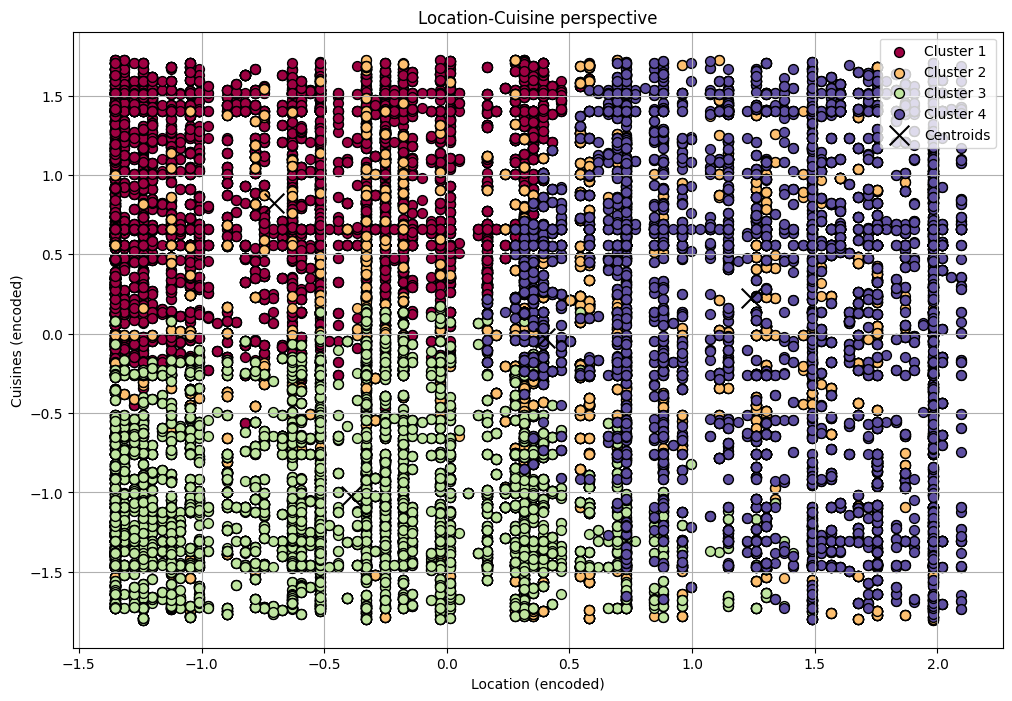

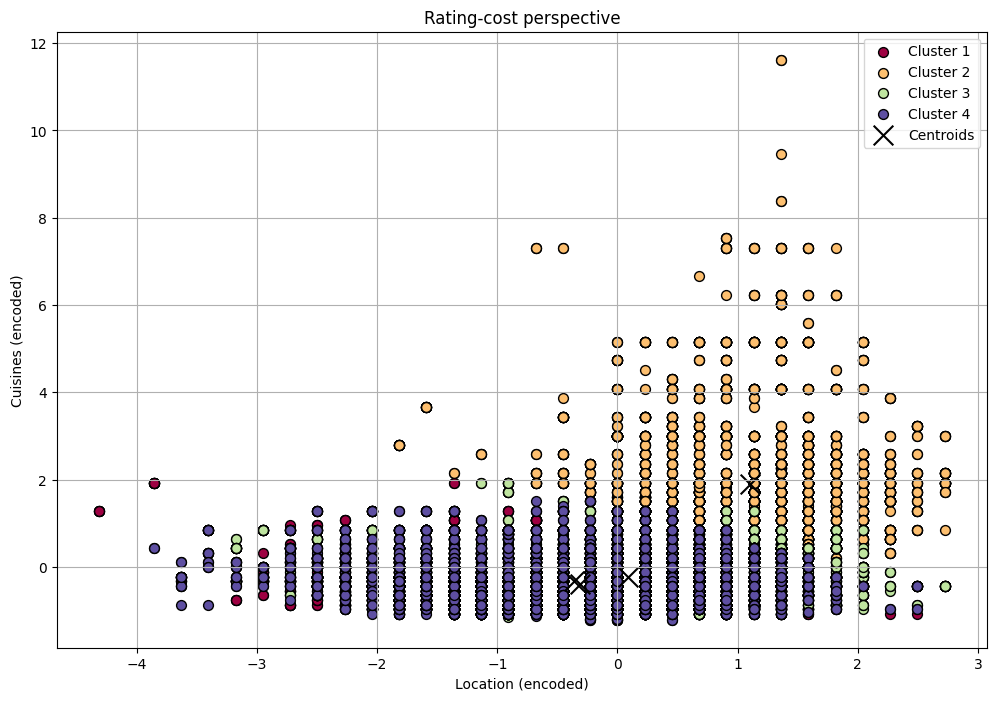

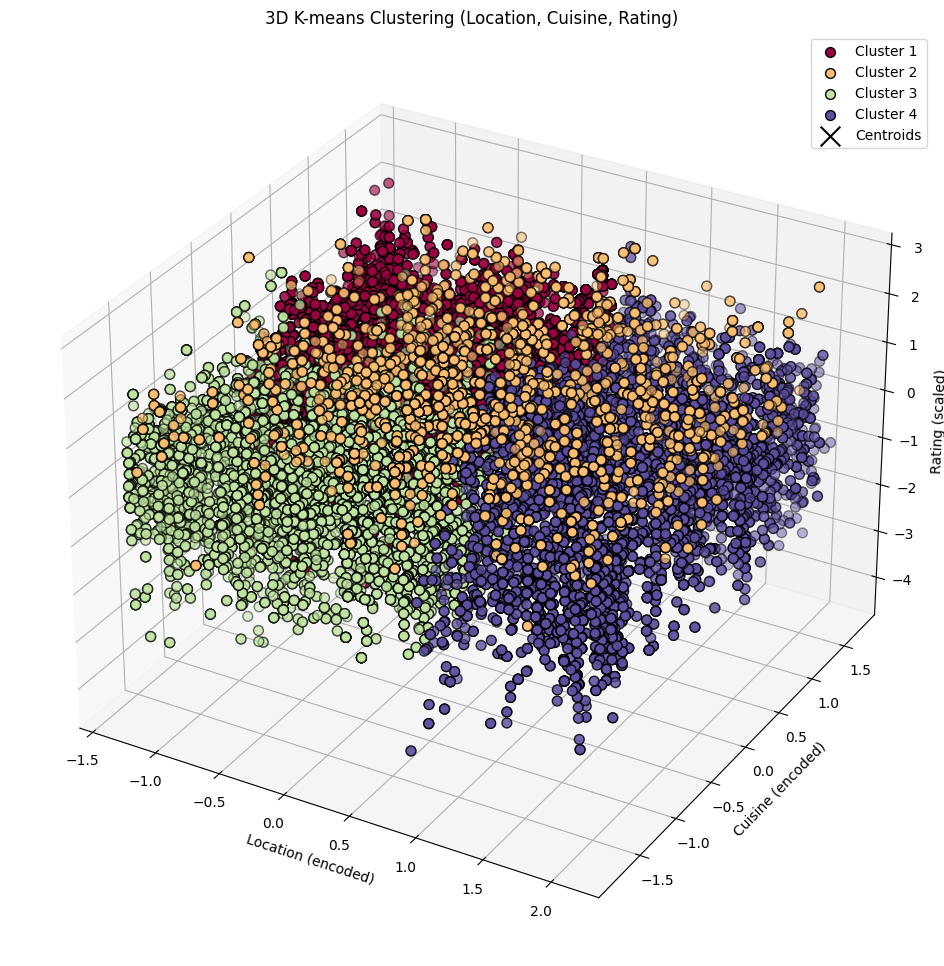

Number of clusters found: 4
Cluster Centers:
 [[-0.31422376 -0.38943981 -0.7059507   0.82411303]
 [ 1.10289894  1.90780424  0.39830092 -0.02687571]
 [ 0.08719095 -0.23383795 -0.39097572 -1.02495671]
 [-0.36285517 -0.33546296  1.23937168  0.22551952]]


In [15]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clustering_encoded)

# Apply KMeans algorithm
n_clusters = 4  # Specify the number of clusters you want to find
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Predict cluster labels
data_clustering['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters (using location and cuisines encoded features for 2D plot)
plt.figure(figsize=(12, 8))
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (kmeans.labels_ == k)
    
    # Visualizing based on location_encoded and cuisines_encoded
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 2], xy[:, 3], marker='o', facecolors=tuple(col), edgecolors='k', s=50, label=f"Cluster {k + 1}")

# Add cluster centers to the plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', marker='x', s=200, label='Centroids')

plt.title('Location-Cuisine perspective')
plt.xlabel('Location (encoded)')
plt.ylabel('Cuisines (encoded)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Visualizing the clusters (using rating and cost encoded features for 2D plot)
plt.figure(figsize=(12, 8))
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (kmeans.labels_ == k)
    
    # Visualizing based on location_encoded and cuisines_encoded
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', facecolors=tuple(col), edgecolors='k', s=50, label=f"Cluster {k + 1}")

# Add cluster centers to the plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, label='Centroids')

plt.title('Rating-cost perspective')
plt.xlabel('Location (encoded)')
plt.ylabel('Cuisines (encoded)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Visualize clusters in 3D (using location, cuisine, and rating as axes)
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Set colors based on the cluster
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    class_member_mask = (kmeans.labels_ == k)
    xy = X_scaled[class_member_mask]
    
    # Plotting with location_encoded, rate, and approx_cost(for two people)
    ax.scatter(xy[:, 2], xy[:, 3], xy[:, 0], marker='o', facecolors=tuple(col), edgecolors='k', s=50, label=f"Cluster {k + 1}")

# Add cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 2], centers[:, 3], centers[:, 0], c='black', marker='x', s=200, label='Centroids')

# Labels and title
ax.set_xlabel('Location (encoded)')
ax.set_ylabel('Cuisine (encoded)')
ax.set_zlabel('Rating (scaled)')
plt.title('3D K-means Clustering (Location, Cuisine, Rating)')
ax.legend()
plt.show()

kmeans_labels = data_clustering['cluster'].values  # Labels from K-Means clustering
# Analyze the clusters
print("Number of clusters found:", n_clusters)
print("Cluster Centers:\n", kmeans.cluster_centers_)

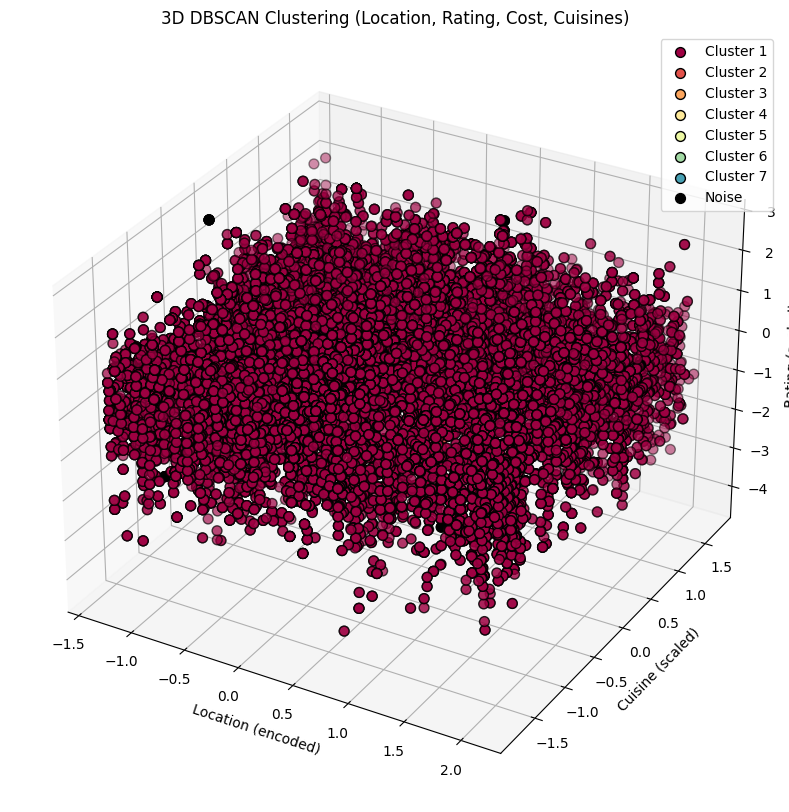

Number of clusters found: 7
Cluster labels:
 {0, 1, 2, 3, 4, 5, 6}


In [16]:
# Apply DBSCAN algorithm with updated parameters
dbscan = DBSCAN(eps=1.0, min_samples=8)  # Updated eps and min_samples to reduce number of clusters

# Predict cluster labels
data_clustering['cluster'] = dbscan.fit_predict(X_scaled)

# Visualizing the DBSCAN clusters in 3D (using location_encoded, rate, and approx_cost as axes)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Set colors based on the cluster
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:  # Black for noise
        col = [0, 0, 0, 1]  # Noise is black
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]
    
    # Plotting with location_encoded, rate, and approx_cost(for two people)
    ax.scatter(xy[:, 2], xy[:, 3], xy[:, 0], marker='o', facecolors=tuple(col), edgecolors='k', s=50, label=f"Cluster {k + 1}" if k != -1 else "Noise")

# Add cluster centers (not typically available for DBSCAN, so we don't plot centroids)
# Labels and title
ax.set_xlabel('Location (encoded)')
ax.set_ylabel('Cuisine (scaled)')
ax.set_zlabel('Rating (scaled)')
plt.title('3D DBSCAN Clustering (Location, Rating, Cost, Cuisines)')
ax.legend()
plt.show()

# Analyze the clusters
clustered_data = data_clustering[data_clustering['cluster'] != -1]  # Remove noise points (-1 label)
print("Number of clusters found:", len(set(clustered_data['cluster'])))
print("Cluster labels:\n", set(clustered_data['cluster']))
dbscan_labels = data_clustering['cluster'].values  # Ensure this is after running DBSCAN

C:\Users\kriti\AppData\Local\Temp\ipykernel_25744\543201069.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(clusters))  # Color map


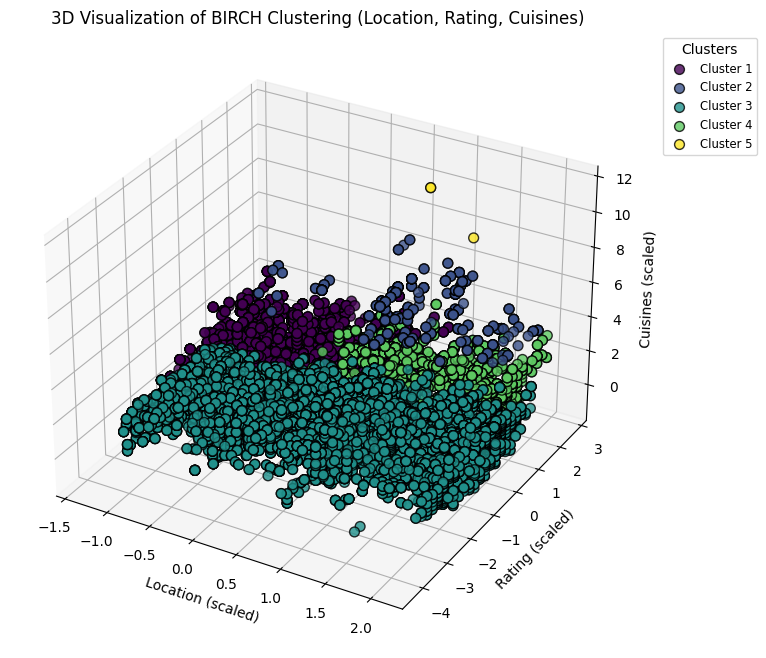

Number of clusters formed: 5
Cluster counts:
 cluster
2    23505
0    15078
3     2316
1      508
4        3
Name: count, dtype: int64


In [17]:
# Selecting features for clustering
X = data_clustering[['location_encoded', 'rate', 'cuisines_encoded', 'approx_cost(for two people)']].values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying BIRCH clustering
n_clusters = 5  # Targeting around 5 clusters
birch = Birch(n_clusters=n_clusters, threshold=0.8)  # Adjust threshold to control cluster branching
data_clustering['cluster'] = birch.fit_predict(X_scaled)

# Assign colors to each cluster
clusters = sorted(data_clustering['cluster'].unique())  # Sorted list of unique clusters
cmap = plt.cm.get_cmap('viridis', len(clusters))  # Color map
colors = [cmap(i) for i in range(len(clusters))]

# Create a color legend mapping
cluster_color_map = {cluster: color for cluster, color in zip(clusters, colors)}

# Visualize the clusters in a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with its assigned color and black edge outline
for cluster in clusters:
    cluster_points = X_scaled[data_clustering['cluster'] == cluster]
    ax.scatter(
        cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 3],
        label=f'Cluster {cluster + 1}',  # Cluster numbers start from 1
        color=cluster_color_map[cluster],
        edgecolors='k',  # Black outline
        s=50, alpha=0.8
    )

# Add labels and title
ax.set_xlabel('Location (scaled)')
ax.set_ylabel('Rating (scaled)')
ax.set_zlabel('Cuisines (scaled)')
plt.title('3D Visualization of BIRCH Clustering (Location, Rating, Cuisines)')

# Add legend with cluster colors
plt.legend(title="Clusters", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

# Analyzing the clusters
cluster_counts = data_clustering['cluster'].value_counts()
print("Number of clusters formed:", len(cluster_counts))
print("Cluster counts:\n", cluster_counts)
birch_labels = data_clustering['cluster'].values  # Ensure this is after running BIRCH

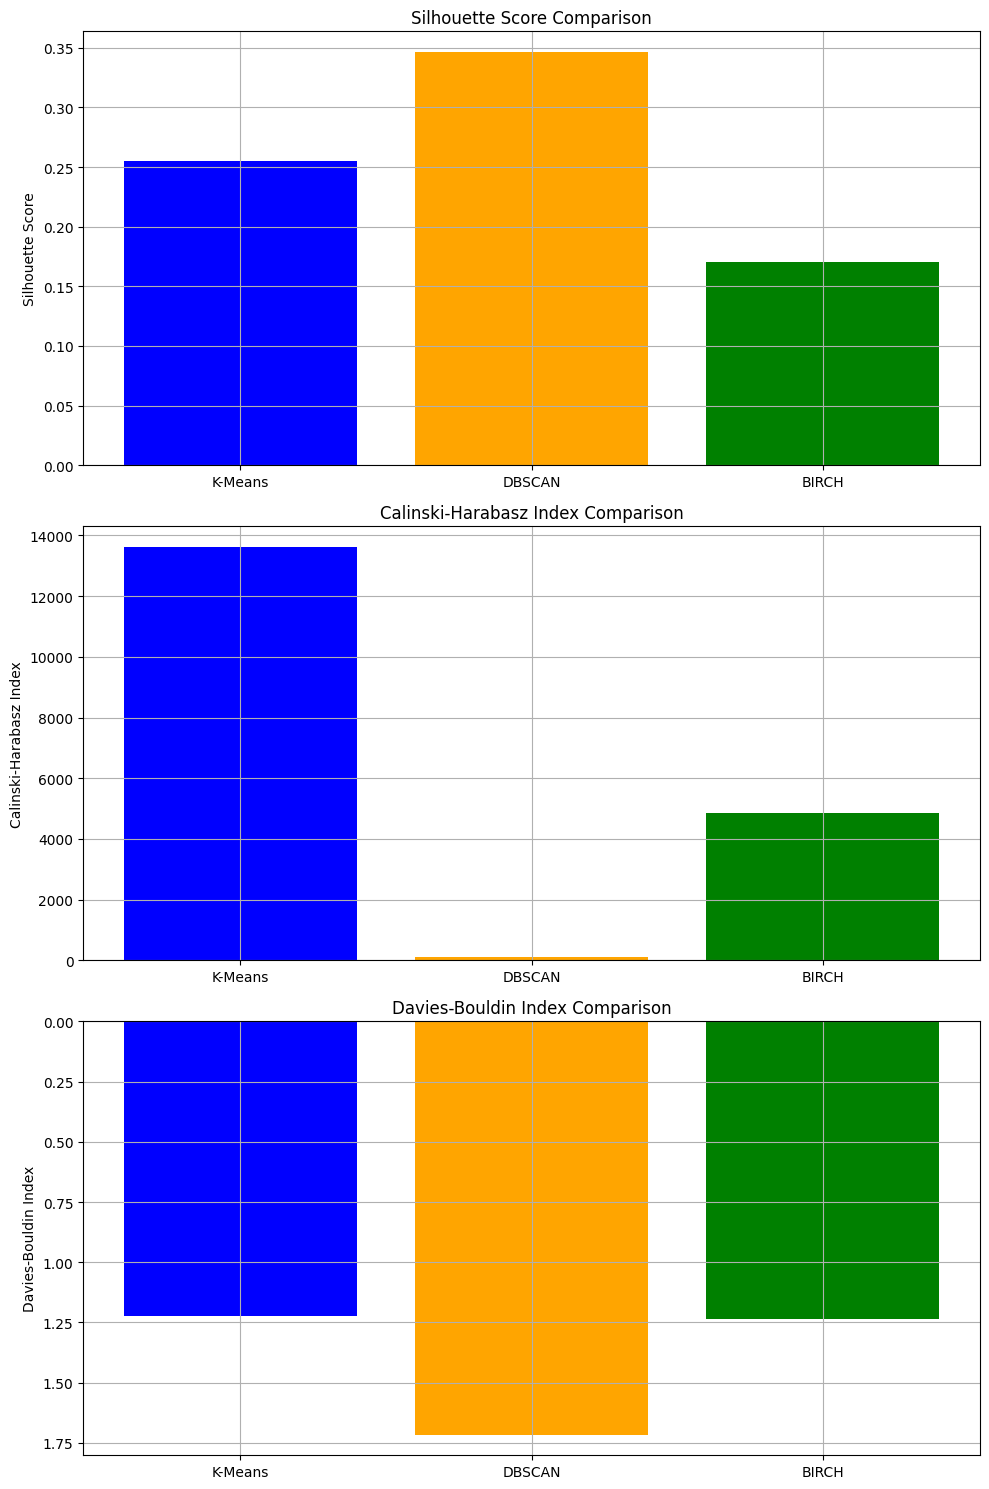

Evaluation Metrics for Clustering Methods:

    Method  Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
0  K-Means          0.255284             13620.150155              1.222616
1   DBSCAN          0.346466               109.420809              1.715546
2    BIRCH          0.170537              4864.114033              1.234168


In [18]:
# Evaluate clustering performance for a given method
def evaluate_clustering(X, labels, method_name):
    """
    Compute evaluation metrics for a clustering method.
    
    Parameters:
    - X: Feature matrix
    - labels: Cluster labels
    - method_name: Name of the clustering method

    Returns: Dictionary with metric scores
    """
    if len(set(labels)) > 1:  # At least 2 clusters required for these metrics
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
    else:
        silhouette, calinski_harabasz, davies_bouldin = np.nan, np.nan, np.nan  # Invalid if 1 cluster

    return {
        "Method": method_name,
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin
    }

# Store evaluation results
evaluation_results = []

# Evaluate K-Means
evaluation_results.append(evaluate_clustering(X_scaled, kmeans_labels, "K-Means"))

# Evaluate DBSCAN
evaluation_results.append(evaluate_clustering(X_scaled, dbscan_labels, "DBSCAN"))

# Evaluate BIRCH
evaluation_results.append(evaluate_clustering(X_scaled, birch_labels, "BIRCH"))

# Convert results to a DataFrame for visualization
import pandas as pd
results_df = pd.DataFrame(evaluation_results)

# Visualization of metrics
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Silhouette Score Comparison
ax[0].bar(results_df['Method'], results_df['Silhouette Score'], color=['blue', 'orange', 'green'])
ax[0].set_title('Silhouette Score Comparison')
ax[0].set_ylabel('Silhouette Score')
ax[0].grid(True)

# Calinski-Harabasz Index Comparison
ax[1].bar(results_df['Method'], results_df['Calinski-Harabasz Index'], color=['blue', 'orange', 'green'])
ax[1].set_title('Calinski-Harabasz Index Comparison')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].grid(True)

# Davies-Bouldin Index Comparison
ax[2].bar(results_df['Method'], results_df['Davies-Bouldin Index'], color=['blue', 'orange', 'green'])
ax[2].set_title('Davies-Bouldin Index Comparison')
ax[2].set_ylabel('Davies-Bouldin Index')
ax[2].invert_yaxis()  # Lower values are better for Davies-Bouldin
ax[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print the evaluation results as a table
print("Evaluation Metrics for Clustering Methods:\n")
print(results_df)

In [20]:
# Initialize geocoder
geolocator = Nominatim(user_agent="zomato_map")

# Function to geocode addresses
def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Function to filter data based on a specific cuisine
def filter_by_cuisine(data, cuisine):
    return data[data['cuisines'].str.contains(cuisine, case=False, na=False)]

# Function to plot an interactive map
def plot_restaurants_map(filtered_data):
    # Create a base map centered around Bangalore
    bangalore_coords = [12.9716, 77.5946]  # Latitude and longitude of Bangalore
    restaurant_map = folium.Map(location=bangalore_coords, zoom_start=12)

    # Add marker clusters
    marker_cluster = MarkerCluster().add_to(restaurant_map)

    # Iterate over filtered data and plot locations on the map
    for idx, row in filtered_data.iterrows():
        address = row['address']
        name = row['name']
        cuisines = row['cuisines']

        # Geocode the address
        lat, lon = geocode_address(address)

        if lat and lon:
            # Create a marker with the restaurant's name and cuisines
            popup_info = f"<b>{name}</b><br>Cuisines: {cuisines}"
            folium.Marker(
                location=[lat, lon],
                popup=popup_info,
                icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
            ).add_to(marker_cluster)

    # Save the map as an HTML file
    restaurant_map.save("restaurants_map.html")

    return restaurant_map

# Filter data for a specific cuisine
input_cuisine = "Chinese"  # Example input, you can replace this with user input
filtered_data = filter_by_cuisine(data, input_cuisine)

# Plot and display the map with restaurants serving the specified cuisine
restaurant_map = plot_restaurants_map(filtered_data)

# Display the map inline if you're using a notebook environment
restaurant_map

In [21]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [19]:
# Convert 'rate' column to numeric, coercing errors to NaN
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')

# Handle NaN values in 'rate' column
data['rate'].fillna(data['rate'].mean(), inplace=True)

# Sentiment Analysis Function
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis to the reviews
data['review_sentiment'] = data['reviews_list'].apply(get_sentiment)

# Analyzing sentiment and rating
average_rating = data['rate'].mean()
average_sentiment = data['review_sentiment'].mean()

print(f"Average Rating: {average_rating}")
print(f"Average Sentiment: {average_sentiment}")

# Optional: Correlation Analysis
correlation = data[['rate', 'review_sentiment']].corr()
print("Correlation between Rating and Sentiment:")
print(correlation)

Average Rating: 3.700405699106496
Average Sentiment: 0.21048270269828115
Correlation between Rating and Sentiment:
                      rate  review_sentiment
rate              1.000000          0.318076
review_sentiment  0.318076          1.000000


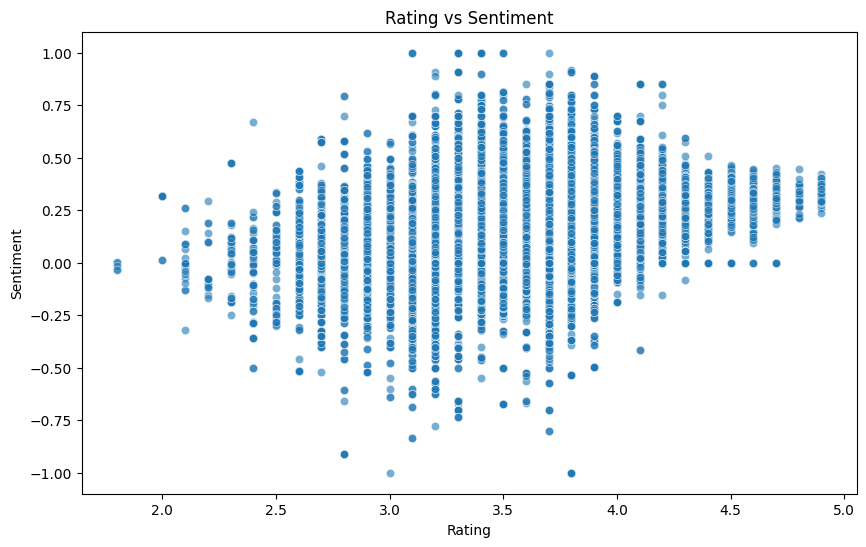

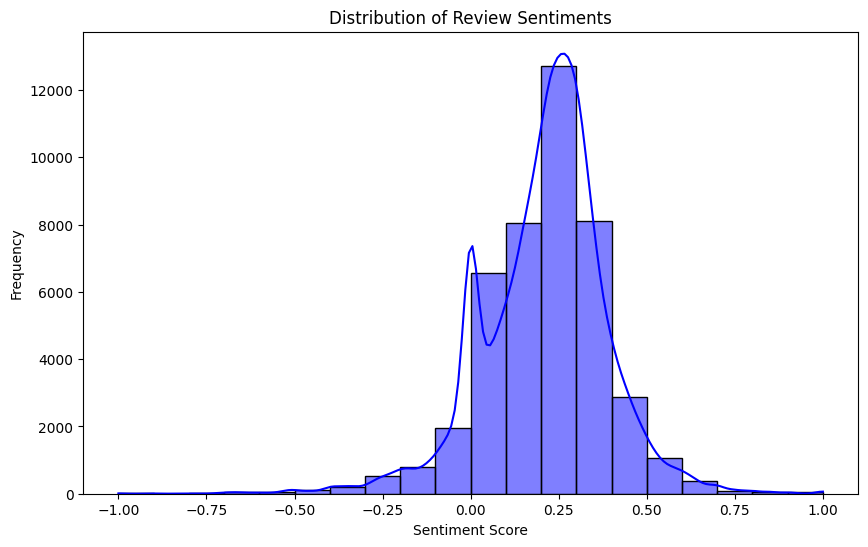

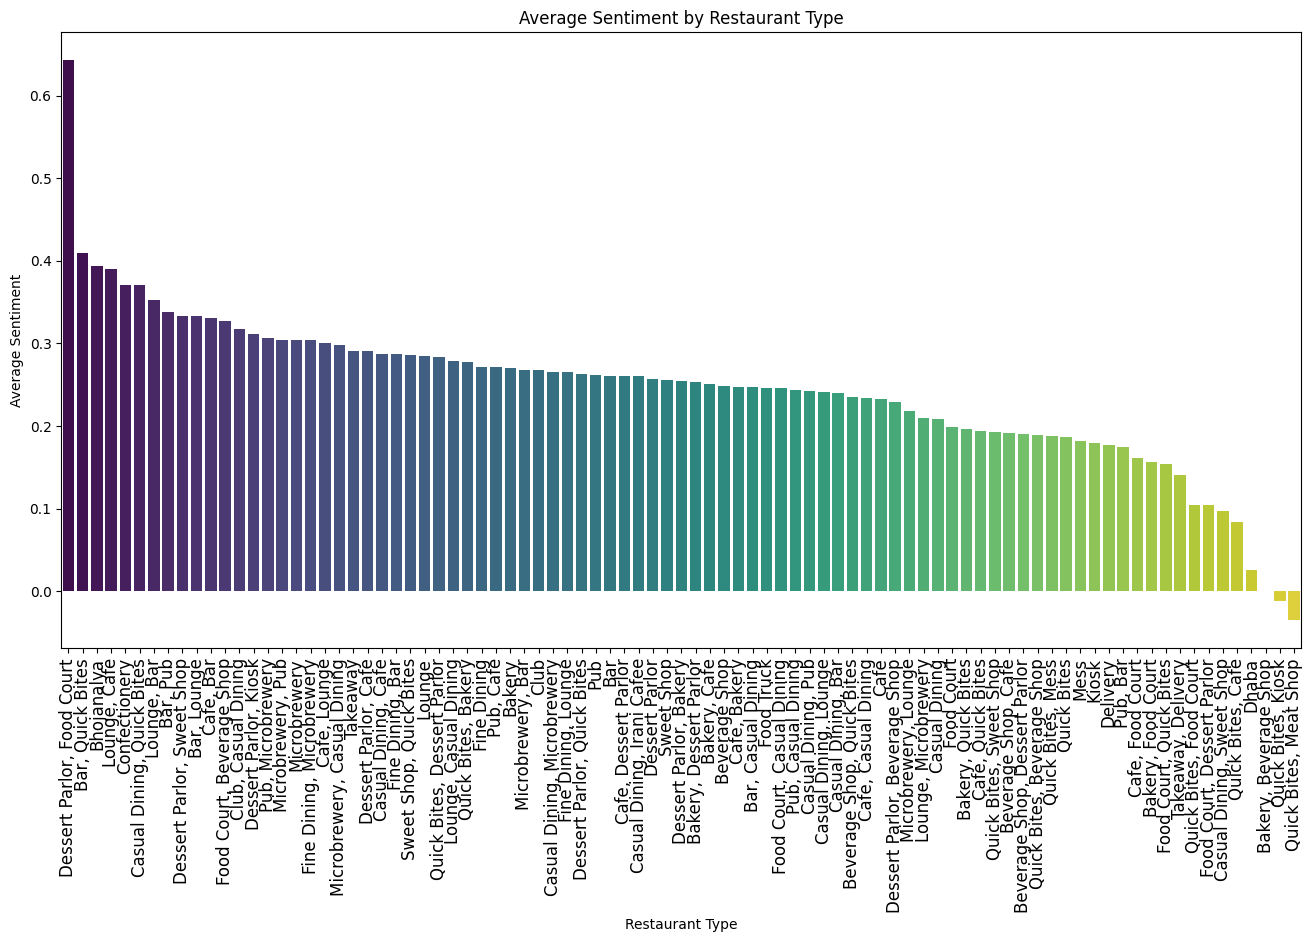

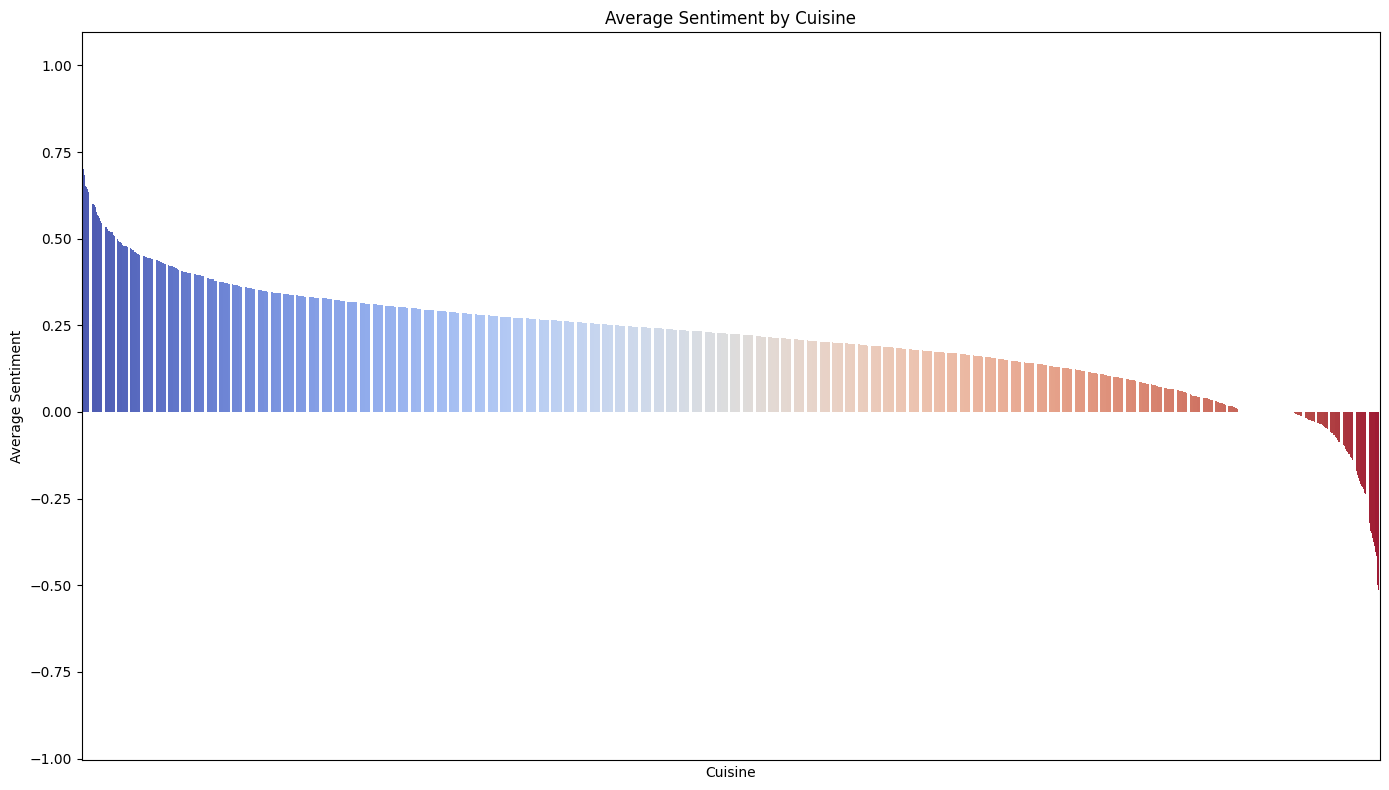

In [20]:
# Visualization: Rating vs Sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='review_sentiment', data=data, alpha=0.6)
plt.title('Rating vs Sentiment')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.savefig('rating_vs_sentiment.png')  # Save as image
plt.show()

# Optional: Visualization of Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['review_sentiment'], bins=20, kde=True, color='blue')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig('sentiment_distribution.png')  # Save as image
plt.show()

# Optional: Average Sentiment by Restaurant Type
average_sentiment_by_type = data.groupby('rest_type')['review_sentiment'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=average_sentiment_by_type.index, y=average_sentiment_by_type.values, palette='viridis')
plt.title('Average Sentiment by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.savefig('sentiment_byRestraunt.png')  # Save as image
plt.show()


# Optional: Average Sentiment by Cuisine
average_sentiment_by_cuisine = data.groupby('cuisines')['review_sentiment'].mean().sort_values(ascending=False)

# Average Sentiment by Cuisine without x-axis labels
plt.figure(figsize=(14, 8))
sns.barplot(x=average_sentiment_by_cuisine.index, y=average_sentiment_by_cuisine.values, palette='coolwarm')
plt.title('Average Sentiment by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Sentiment')
plt.xticks([], [])  # Removes x-axis labels
plt.tight_layout()
plt.savefig('average_sentiment_by_cuisine_no_labels.png')  # Save as image
plt.show()

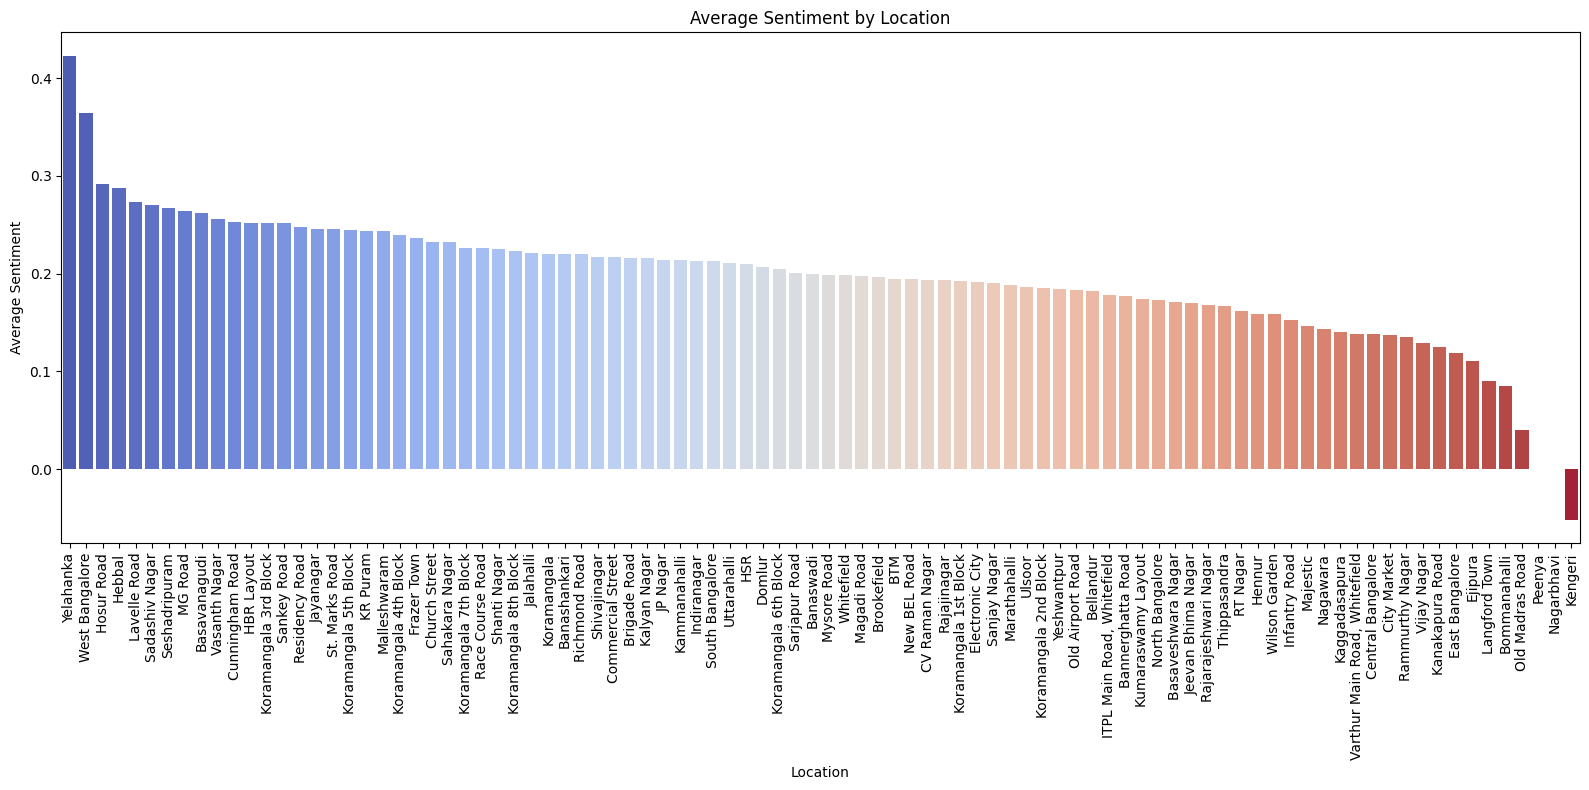

In [21]:
#Average Sentiment by Location
average_sentiment_by_location = data.groupby('location')['review_sentiment'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=average_sentiment_by_location.index, y=average_sentiment_by_location.values, palette='coolwarm')
plt.title('Average Sentiment by Location')
plt.xlabel('Location')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.tight_layout()  # Ensures no label is cut off
plt.show()

In [22]:
#Economic data analysis(generating dummy data)

In [23]:
unique_locations = data['location'].unique()

# Display the unique locations
print(unique_locations)

['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Bannerghatta Road' 'BTM'
 'Kanakapura Road' 'Bommanahalli' 'CV Raman Nagar' 'Electronic City'
 'Sarjapur Road' 'Wilson Garden' 'Shanti Nagar' 'Koramangala 5th Block'
 'Richmond Road' 'HSR' 'Marathahalli' 'Koramangala 7th Block' 'Bellandur'
 'Whitefield' 'East Bangalore' 'Old Airport Road' 'Indiranagar'
 'Koramangala 1st Block' 'Frazer Town' 'MG Road' 'Brigade Road'
 'Lavelle Road' 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar'
 'Infantry Road' 'St. Marks Road' 'Cunningham Road' 'Race Course Road'
 'Commercial Street' 'Vasanth Nagar' 'Domlur' 'Koramangala 8th Block'
 'Ejipura' 'Jeevan Bhima Nagar' 'Old Madras Road' 'Seshadripuram'
 'Kammanahalli' 'Koramangala 6th Block' 'Majestic' 'Langford Town'
 'Central Bangalore' 'Sanjay Nagar' 'Brookefield'
 'ITPL Main Road, Whitefield' 'Varthur Main Road, Whitefield

In [ ]:
# List of ward locations
wards = [
    'Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar', 'Kumaraswamy Layout', 
    'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore', 
    'City Market', 'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road', 
    'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli', 
    'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block', 
    'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block', 'Jalahalli', 
    'Koramangala 4th Block', 'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road', 
    'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road', 
    'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road', 
    'Shivajinagar', 'Infantry Road', 'St. Marks Road', 'Cunningham Road', 'Race Course Road', 
    'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura', 
    'Jeevan Bhima Nagar', 'Old Madras Road', 'Malleshwaram', 'Seshadripuram', 
    'Kammanahalli', 'Koramangala 6th Block', 'Majestic', 'Langford Town', 
    'Central Bangalore', 'Sanjay Nagar', 'Brookefield', 'ITPL Main Road, Whitefield', 
    'Varthur Main Road, Whitefield', 'KR Puram', 'Koramangala 2nd Block', 
    'Koramangala 3rd Block', 'Koramangala', 'Hosur Road', 'Rajajinagar', 
    'Banaswadi', 'North Bangalore', 'Nagawara', 'Hennur', 'Kalyan Nagar', 
    'New BEL Road', 'Jakkur', 'Rammurthy Nagar', 'Thippasandra', 'Kaggadasapura', 
    'Hebbal', 'Kengeri', 'Sankey Road', 'Sadashiv Nagar', 'Basaveshwara Nagar', 
    'Yeshwantpur', 'West Bangalore', 'Magadi Road', 'Yelahanka', 'Sahakara Nagar', 
    'Peenya'
]

# Generate dummy average income data
import numpy as np

# Define approximate income ranges based on general economic level in different areas
income_ranges = {
    'low': (10000, 20000),
    'mid': (20000, 50000),
    'high': (50000, 80000)
}

# Assign income categories based on neighborhood profiles
income_data = {
    'Banashankari': 'mid', 'Basavanagudi': 'high', 'Mysore Road': 'low', 'Jayanagar': 'high', 
    'Kumaraswamy Layout': 'mid', 'Rajarajeshwari Nagar': 'mid', 'Vijay Nagar': 'low', 
    'Uttarahalli': 'mid', 'JP Nagar': 'high', 'South Bangalore': 'mid', 'City Market': 'low', 
    'Nagarbhavi': 'mid', 'Bannerghatta Road': 'high', 'BTM': 'mid', 'Kanakapura Road': 'mid', 
    'Bommanahalli': 'low', 'CV Raman Nagar': 'mid', 'Electronic City': 'low', 'HSR': 'high', 
    'Marathahalli': 'mid', 'Sarjapur Road': 'high', 'Wilson Garden': 'mid', 'Shanti Nagar': 'mid', 
    'Koramangala 5th Block': 'high', 'Koramangala 8th Block': 'high', 'Richmond Road': 'high', 
    'Koramangala 7th Block': 'high', 'Jalahalli': 'mid', 'Koramangala 4th Block': 'high', 
    'Bellandur': 'mid', 'Whitefield': 'high', 'East Bangalore': 'mid', 'Old Airport Road': 'high', 
    'Indiranagar': 'high', 'Koramangala 1st Block': 'high', 'Frazer Town': 'mid', 'RT Nagar': 'mid', 
    'MG Road': 'high', 'Brigade Road': 'high', 'Lavelle Road': 'high', 'Church Street': 'high', 
    'Ulsoor': 'mid', 'Residency Road': 'high', 'Shivajinagar': 'mid', 'Infantry Road': 'high', 
    'St. Marks Road': 'high', 'Cunningham Road': 'high', 'Race Course Road': 'high', 
    'Commercial Street': 'high', 'Vasanth Nagar': 'high', 'HBR Layout': 'mid', 'Domlur': 'mid', 
    'Ejipura': 'low', 'Jeevan Bhima Nagar': 'mid', 'Old Madras Road': 'mid', 'Malleshwaram': 'high', 
    'Seshadripuram': 'mid', 'Kammanahalli': 'mid', 'Koramangala 6th Block': 'high', 'Majestic': 'low', 
    'Langford Town': 'mid', 'Central Bangalore': 'high', 'Sanjay Nagar': 'mid', 'Brookefield': 'high', 
    'ITPL Main Road, Whitefield': 'mid', 'Varthur Main Road, Whitefield': 'mid', 'KR Puram': 'low', 
    'Koramangala 2nd Block': 'high', 'Koramangala 3rd Block': 'high', 'Koramangala': 'high', 
    'Hosur Road': 'mid', 'Rajajinagar': 'mid', 'Banaswadi': 'mid', 'North Bangalore': 'mid', 
    'Nagawara': 'low', 'Hennur': 'mid', 'Kalyan Nagar': 'mid', 'New BEL Road': 'mid', 'Jakkur': 'low', 
    'Rammurthy Nagar': 'low', 'Thippasandra': 'mid', 'Kaggadasapura': 'low', 'Hebbal': 'mid', 
    'Kengeri': 'low', 'Sankey Road': 'high', 'Sadashiv Nagar': 'high', 'Basaveshwara Nagar': 'mid', 
    'Yeshwantpur': 'low', 'West Bangalore': 'low', 'Magadi Road': 'low', 'Yelahanka': 'mid', 
    'Sahakara Nagar': 'mid', 'Peenya': 'low'
}

# Create dummy data with income values for each ward
income_values = []
for ward in wards:
    income_category = income_data.get(ward, 'mid')  # default to 'mid' if not found
    income_range = income_ranges[income_category]
    avg_income = np.random.randint(*income_range)
    income_values.append(avg_income)

# Create DataFrame
dummy_data = pd.DataFrame({'Ward': wards, 'Average_Income': income_values})

# Display the first few rows
print(dummy_data.head())

In [ ]:
# Define a function to calculate price range
def calculate_price_range(income):
    # Assuming spending 5-15% of monthly income per meal
    lower_limit = round(income * 0.05)  # 5% of monthly income
    upper_limit = round(income * 0.15) # 15% of monthly income
    return f"{lower_limit} - {upper_limit}"

# Add a 'Reasonable_Price_Range' column to the DataFrame
dummy_data['Reasonable_Price_Range'] = dummy_data['Average_Income'].apply(calculate_price_range)

# Display the updated DataFrame
print(dummy_data.head())

In [11]:
import pandas as pd
import numpy as np

# List of ward locations
wards = [
    'Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar', 'Kumaraswamy Layout', 
    'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore', 
    'City Market', 'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road', 
    'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli', 
    'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block', 
    'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block', 'Jalahalli', 
    'Koramangala 4th Block', 'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road', 
    'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road', 
    'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road', 
    'Shivajinagar', 'Infantry Road', 'St. Marks Road', 'Cunningham Road', 'Race Course Road', 
    'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura', 
    'Jeevan Bhima Nagar', 'Old Madras Road', 'Malleshwaram', 'Seshadripuram', 
    'Kammanahalli', 'Koramangala 6th Block', 'Majestic', 'Langford Town', 
    'Central Bangalore', 'Sanjay Nagar', 'Brookefield', 'ITPL Main Road, Whitefield', 
    'Varthur Main Road, Whitefield', 'KR Puram', 'Koramangala 2nd Block', 
    'Koramangala 3rd Block', 'Koramangala', 'Hosur Road', 'Rajajinagar', 
    'Banaswadi', 'North Bangalore', 'Nagawara', 'Hennur', 'Kalyan Nagar', 
    'New BEL Road', 'Jakkur', 'Rammurthy Nagar', 'Thippasandra', 'Kaggadasapura', 
    'Hebbal', 'Kengeri', 'Sankey Road', 'Sadashiv Nagar', 'Basaveshwara Nagar', 
    'Yeshwantpur', 'West Bangalore', 'Magadi Road', 'Yelahanka', 'Sahakara Nagar', 
    'Peenya'
]

# Define adjusted income ranges
income_ranges = {
    'low': (15000, 30000),
    'mid': (30001, 75000),
    'high': (75001, 150000)
}

# Assign income categories to wards (same mapping from earlier)
income_data = {
    'Banashankari': 'mid', 'Basavanagudi': 'high', 'Mysore Road': 'low', 'Jayanagar': 'high', 
    'Kumaraswamy Layout': 'mid', 'Rajarajeshwari Nagar': 'mid', 'Vijay Nagar': 'low', 
    'Uttarahalli': 'mid', 'JP Nagar': 'high', 'South Bangalore': 'mid', 'City Market': 'low', 
    'Nagarbhavi': 'mid', 'Bannerghatta Road': 'high', 'BTM': 'mid', 'Kanakapura Road': 'mid', 
    'Bommanahalli': 'low', 'CV Raman Nagar': 'mid', 'Electronic City': 'low', 'HSR': 'high', 
    'Marathahalli': 'mid', 'Sarjapur Road': 'high', 'Wilson Garden': 'mid', 'Shanti Nagar': 'mid', 
    'Koramangala 5th Block': 'high', 'Koramangala 8th Block': 'high', 'Richmond Road': 'high', 
    'Koramangala 7th Block': 'high', 'Jalahalli': 'mid', 'Koramangala 4th Block': 'high', 
    'Bellandur': 'mid', 'Whitefield': 'high', 'East Bangalore': 'mid', 'Old Airport Road': 'high', 
    'Indiranagar': 'high', 'Koramangala 1st Block': 'high', 'Frazer Town': 'mid', 'RT Nagar': 'mid', 
    'MG Road': 'high', 'Brigade Road': 'high', 'Lavelle Road': 'high', 'Church Street': 'high', 
    'Ulsoor': 'mid', 'Residency Road': 'high', 'Shivajinagar': 'mid', 'Infantry Road': 'high', 
    'St. Marks Road': 'high', 'Cunningham Road': 'high', 'Race Course Road': 'high', 
    'Commercial Street': 'high', 'Vasanth Nagar': 'high', 'HBR Layout': 'mid', 'Domlur': 'mid', 
    'Ejipura': 'low', 'Jeevan Bhima Nagar': 'mid', 'Old Madras Road': 'mid', 'Malleshwaram': 'high', 
    'Seshadripuram': 'mid', 'Kammanahalli': 'mid', 'Koramangala 6th Block': 'high', 'Majestic': 'low', 
    'Langford Town': 'mid', 'Central Bangalore': 'high', 'Sanjay Nagar': 'mid', 'Brookefield': 'high', 
    'ITPL Main Road, Whitefield': 'mid', 'Varthur Main Road, Whitefield': 'mid', 'KR Puram': 'low', 
    'Koramangala 2nd Block': 'high', 'Koramangala 3rd Block': 'high', 'Koramangala': 'high', 
    'Hosur Road': 'mid', 'Rajajinagar': 'mid', 'Banaswadi': 'mid', 'North Bangalore': 'mid', 
    'Nagawara': 'low', 'Hennur': 'mid', 'Kalyan Nagar': 'mid', 'New BEL Road': 'mid', 'Jakkur': 'low', 
    'Rammurthy Nagar': 'low', 'Thippasandra': 'mid', 'Kaggadasapura': 'low', 'Hebbal': 'mid', 
    'Kengeri': 'low', 'Sankey Road': 'high', 'Sadashiv Nagar': 'high', 'Basaveshwara Nagar': 'mid', 
    'Yeshwantpur': 'low', 'West Bangalore': 'low', 'Magadi Road': 'low', 'Yelahanka': 'mid', 
    'Sahakara Nagar': 'mid', 'Peenya': 'low'
}

# Generate average incomes for each ward
income_values = [
    np.random.randint(*income_ranges[income_data.get(ward, 'mid')]) for ward in wards
]

# Create a DataFrame
df = pd.DataFrame({'Ward': wards, 'Average_Income': income_values})

# Save to CSV
csv_file = "bangalore_ward_avg_income.csv"
df.to_csv(csv_file, index=False)

print(f"Dataset saved to {csv_file}")

Dataset saved to bangalore_ward_avg_income.csv


In [24]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list  review_sentiment  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          0.329379  
1  [('Rated 4.0', 'RATED\n  Had been here for din...          0.182998  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          0.146318  
3  [('Rated 4.0', "RATED\n  Great food and proper...          0.245691  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          0.419160

In [25]:
# Load socioeconomic data
income_data = pd.read_csv(r"C:\Users\kriti\OneDrive\Desktop\SNU\7th semester\project\final\bangalore_ward_avg_income.csv")
population_data = pd.read_csv(r"C:\Users\kriti\OneDrive\Desktop\SNU\7th semester\project\final\wardareawisepopulation.csv")

# Ensure column names are clean
income_data['Ward'] = income_data['Ward'].str.strip().str.lower()
population_data['Ward Name'] = population_data['Ward Name'].str.strip().str.lower()
data['location'] = data['location'].str.strip().str.lower()

# Merge income and population data
socioeconomic_data = pd.merge(income_data, population_data, left_on='Ward', right_on='Ward Name', how='left')

# Convert data types
socioeconomic_data['Average_Income'] = socioeconomic_data['Average_Income'].replace(',', '', regex=True).astype(float)
socioeconomic_data['Population'] = socioeconomic_data['Population'].replace(',', '', regex=True).astype(int)

# Normalize socioeconomic features
scaler = MinMaxScaler()
socioeconomic_data[['Average_Income', 'Population']] = scaler.fit_transform(
    socioeconomic_data[['Average_Income', 'Population']]
)

# Merge socioeconomic data with the main dataset
data = pd.merge(data, socioeconomic_data, left_on='location', right_on='Ward Name', how='left')

In [97]:
# Recommendation model
def recommend_locations(cuisine, dining_type, top_n=3):
    # Filter data based on cuisine
    filtered_data = data[data['cuisines'].str.contains(cuisine, case=False, na=False)]
    
    if dining_type == "affordable":
        # Score locations for affordable dining
        location_scores = filtered_data.groupby('location').apply(
            lambda x: np.mean(x['rate']) * 0.4 + np.mean(x['review_sentiment']) * 0.4 +
                      (1 - np.mean(x['Average_Income'])) * 0.2  # Weight for lower-income areas
        ).sort_values(ascending=False)
    elif dining_type == "fine dining":
        # Score locations for fine dining
        location_scores = filtered_data.groupby('location').apply(
            lambda x: np.mean(x['rate']) * 0.4 + np.mean(x['review_sentiment']) * 0.4 +
                      np.mean(x['Average_Income']) * 0.2  # Weight for higher-income areas
        ).sort_values(ascending=False)
    else:
        # Default scoring
        location_scores = filtered_data.groupby('location').apply(
            lambda x: np.mean(x['rate']) * 0.4 + np.mean(x['review_sentiment']) * 0.4 +
                      np.mean(x['Average_Income']) * 0.1 + np.mean(x['Population']) * 0.1
        ).sort_values(ascending=False)
    
    # Return top N locations
    return location_scores.head(top_n)

def recommend_cuisines(location, dining_type, top_n=3):
    # Filter data based on location
    filtered_data = data[data['location'].str.contains(location, case=False, na=False)]
    
    # Group by cuisines and calculate weighted scores
    cuisine_scores = filtered_data.groupby('cuisines').apply(
        lambda x: np.mean(x['rate']) * 0.4 + np.mean(x['review_sentiment']) * 0.4 +
                  np.mean(x['Average_Income']) * 0.1 + np.mean(x['Population']) * 0.1
    ).sort_values(ascending=False)
    
    # Return top N cuisines
    return cuisine_scores.head(top_n)

def recommend_price_range(location=None, cuisine=None, dining_type=None):
    # Filter data based on location and/or cuisine
    filtered_data = data
    if location:
        filtered_data = filtered_data[filtered_data['location'].str.contains(location, case=False, na=False)]
    if cuisine:
        filtered_data = filtered_data[filtered_data['cuisines'].str.contains(cuisine, case=False, na=False)]
    
    # Check if there is sufficient data
    if filtered_data.empty or 'approx_cost(for two people)' not in filtered_data.columns:
        return "Price range data not available."

    # Calculate cost statistics
    avg_cost = filtered_data['approx_cost(for two people)'].mean()
    median_cost = filtered_data['approx_cost(for two people)'].median()

    # Define realistic price ranges
    if dining_type == "affordable":
        # Set a reasonable range for affordable dining
        low_range = max(500, round(median_cost * 0.5))  # Minimum ₹500 or 50% of the median cost
        high_range = max(800, round(median_cost * 0.7))  # Minimum ₹800 or 70% of the median cost
        return low_range, high_range
    elif dining_type == "fine dining":
        # Set a reasonable range for fine dining
        low_range = max(1500, round(median_cost * 1.5))  # Minimum ₹1500 or 1.5 times the median cost
        high_range = max(2500, round(median_cost * 2.5))  # Minimum ₹3000 or 2.5 times the median cost
        return low_range, high_range
    else:
        # General range around the median
        low_range = max(500, round(median_cost * 0.8))  # Minimum ₹500 or 80% of the median cost
        high_range = max(1500, round(median_cost * 1.2))  # Minimum ₹1500 or 120% of the median cost
        return low_range, high_range

# Main interactive script
def main():
    user_input = input("Do you have a restaurant cuisine or location? (Enter 'cuisine' or 'location'): ").strip().lower()
    
    if user_input == "cuisine":
        cuisine = input("Enter the cuisine: ").strip().lower()
        price_recommendation = input("Do you need price recommendations? (yes/no): ").strip().lower()
        dining_type = None
        if price_recommendation == "yes":
            dining_type = input("What type of dining? (affordable/fine dining): ").strip().lower()
            price_range = recommend_price_range(cuisine=cuisine, dining_type=dining_type)
            print(f"Best suited price range for {cuisine} ({dining_type}): {price_range}")
        top_locations = recommend_locations(cuisine=cuisine, dining_type=dining_type)
        print(f"Top locations for {cuisine}:")
        print(top_locations)
    
    elif user_input == "location":
        location = input("Enter the location: ").strip().lower()
        price_recommendation = input("Do you need price recommendations? (yes/no): ").strip().lower()
        dining_type = None
        if price_recommendation == "yes":
            dining_type = input("What type of dining? (affordable/fine dining): ").strip().lower()
            price_range = recommend_price_range(location=location, dining_type=dining_type)
            print(f"Best suited price range for {location} ({dining_type}): {price_range}")
        top_cuisines = recommend_cuisines(location=location, dining_type=dining_type)
        print(f"Top cuisines for {location}:")
        print(top_cuisines)
    else:
        print("Invalid input. Please enter 'cuisine' or 'location'.")

# Run the program
main()

Do you have a restaurant cuisine or location? (Enter 'cuisine' or 'location'):  cuisine
Enter the cuisine:  japanese
Do you need price recommendations? (yes/no):  yes
What type of dining? (affordable/fine dining):  fine dining


Best suited price range for japanese (fine dining): (2250, 3750)
Top locations for japanese:
location
cunningham road          2.171892
st. marks road           2.098227
koramangala 5th block    2.014688
dtype: float64
